# Week 5 exercise: Simple MD simulations

- Implement a numerical simulation of the dynamics of an Harmonic oscillator, using the verlet algorithm to integrate the equations of motion. 

- Represent the dynamics of the harmonic oscillator in phase space. 

- Is the total energy conserved? 

- What happens by changing the timestep? 



# 1D Harmonic Oscillator
## System Setup

In [123]:
%matplotlib inline
## Import libraries to plot and do math
import matplotlib.pyplot as plt 
import numpy as np

## Setup parameters of the HA
m=1.0; #mass
k=5; #Harmonic Constant
req=1.5; #Equilirbium 
##

## Set the initial Conditions
r0=1.0; # Initial position
v0=.5;  # Initial velocity

## Define the timestep and the total time
dt=0.01; #timestep
total_time=50; 
# Compute the total number of steps
nsteps=int(total_time/dt); # Total number of steps

## Initialise vectors 
v=np.zeros(nsteps)
r=np.zeros(nsteps)
time=np.zeros(nsteps)
POT=np.zeros(nsteps)
KIN=np.zeros(nsteps)

## Definition of useful functions. 

### Calculation of the force and potential energy

The force is computed as the negative of the potential derivative with respect to the degree of the degree of freedom. 

The potential is $V(r(t))=\frac{1}{2}k(r(t)-req)^2$, hence the force is: 

$$
F(t)=-\frac{\partial{V(r(t))}}{\partial{r(t)}}=-k(r(t)-req)
$$ 

In the code below the function computing the force is implemented as: 

```force=lambda r, k, req, : -k*(r-req)```

and the function computing the potential energy is defined as: 

```energy_pot=lambda r, k, req: 0.5*k*np.power(r-req,2)```

### Calculation of the velocity and kinetic energy

The velocity at time $t$, $v(t)$ is computed as: 

$$v(t)=\frac{r(t+\Delta{t})-r(t-\Delta{t})}{2\Delta{t}}$$ 

```velocity=lambda r, r_past, dt: (r-r_past)/2/dt```

The kinetic energy $K(v)=\frac{1}{2}mv^2$

```energy_kin=lambda v, m: 0.5*m*np.power(v,2)```

### Propagation of the system's dynamics: 

We use the Verlet algorithm: 

$$
r(t+\Delta{t})=2r(t)-r(t-\Delta{t})+\frac{F(t)}{m}\Delta{t}^2
$$

implemented as: 

```verlet=lambda r, r_past, force, mass, dt:  2*r-r_past+(dt**2)*force/mass```

In [124]:
## Useful functions
force=lambda r, k, req, : -k*(r-req)
energy_pot=lambda r, k, req: 0.5*k*np.power(r-req,2)
velocity=lambda r, r_past, dt: (r-r_past)/2/dt
energy_kin=lambda v, m: 0.5*m*np.power(v,2)
verlet=lambda r, r_past, force, mass, dt:  2*r-r_past+(dt**2)*force/mass

# initialise position and velocity

time[0]=0;
time[1]=dt;
v[0]=v0;
r[0]=r0;
r[1]=r[0]+v[0]*dt
v[1]=velocity(r[0],r[1],dt);

for i in np.arange(0,2):
    POT[i]=energy_pot(r[i],k,req)
    KIN[i]=energy_kin(v[i],m)

### Compute Trajectory

Propagate the dynamics with the Verlet algorithm :

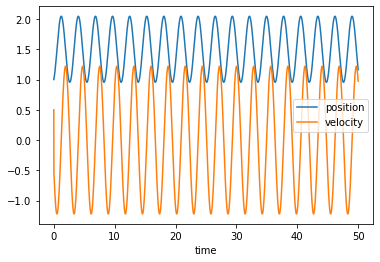

In [125]:
# Compute trajectory
for ts in np.arange(1,nsteps-1): #Cycle over timesteps
    
    f=force(r[ts],k,req) # Compute the force 
     
    r[ts+1]=verlet(r[ts],r[ts-1],f,m,dt) # Compute the next position
    time[ts+1]=time[ts]+dt # update the clock
    
    v[ts]=velocity(r[ts-1],r[ts+1],dt) # compute the velocity     
    POT[ts]=energy_pot(r[ts],k,req)  # compute the Potential Energy     
    KIN[ts]=energy_kin(v[ts],m)      # compute the Kinetic Energy    
    
v[ts+1]=v[ts]

plt.plot(time,r,label='position');
plt.plot(time,v,label='velocity');
plt.legend();
plt.xlabel('time');


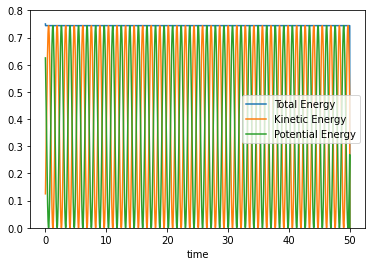

In [126]:
# Conservation of energy
plt.plot(time,POT+KIN,label='Total Energy')
plt.plot(time,KIN,label='Kinetic Energy')
plt.plot(time,POT,label='Potential Energy')
plt.ylim([0, np.max(POT+KIN)+0.05])
plt.legend()
plt.xlabel('time');

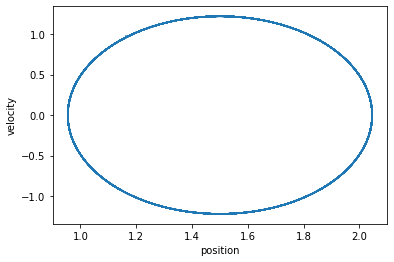

In [130]:
# Motion in phase space
plt.plot(r[10:],v[10:])
plt.xlabel('position');
plt.ylabel('velocity');

In [127]:
# Visualize trajectory
%%capture
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
# Animate the results
def init():
    line.set_data([], [])
    return (line,)

fig, ax = plt.subplots(figsize=(8, 5))

#ax.set_xlim(( 0, total_time))
ax.set_xlim(-(np.max(r)/2+0.1*np.max(r)), np.max(r)/2+0.1*np.max(r))
line, = ax.plot([], [], lw=2, marker='o', markersize=45, markerfacecolor=(0.8, 1.0, 0.8, 0.5),
             markeredgewidth=1,  markeredgecolor=(0, 0, 0, .5), linestyle='-.',color='r')

def animate(i):
    x = np.array([-r[i]/2,r[i]/2])
    y = np.array([0,0])
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(1,nsteps,50), interval=100, blit=True)

In [128]:
HTML(anim.to_html5_video())

# Ideal Gas in a 2D box
## System Setup


In [184]:
%matplotlib inline
## Import libraries to plot and do math
import matplotlib.pyplot as plt 
import numpy as np

## Setup parameters Lennard-Jones potential
epsilon=1.0; #mass
sigma=5; #Harmonic Constant 
##

#mass of the particles
m=np.array([1,1,1,1,1,1,1,1]);

## Set the initial Conditions
x0=np.array([1, 2, 3, 3, 3, 2, 1, 1]);       
y0=np.array([1, 1, 1, 2, 3, 3, 3, 2]);

# Random initial velocities
v0=(np.random.rand(2,8)-0.5);

## Define the timestep and the total time
dt=0.01; #timestep
total_time=500; 
# Compute the total number of steps
nsteps=int(total_time/dt); # Total number of steps

## Initialise vectors 
v=np.zeros(nsteps)
r=np.zeros(nsteps)
time=np.zeros(nsteps)
POT=np.zeros(nsteps)
KIN=np.zeros(nsteps)

In [189]:
## Compute a trajectory with the Verlet Algorithm
# Initialise positions at t-dt
xp=x0;
yp=y0;

# Position at time t
x=xp+v0[0,:]*dt;
y=yp+v0[1,:]*dt;

# Position at time t+dt
xnew=np.zeros(np.shape(x0));
ynew=np.zeros(np.shape(x0));

# time
time=np.arange(0,nsteps);
xx=np.zeros((np.size(time),np.size(x)));xx[0]=x0
yy=np.zeros((np.size(time),np.size(y)));yy[0]=y0
time[0]=0;
time[1]=time[0]+dt;


# Compute trajectory
for timestep in np.arange(1,nsteps): #Cycle over timesteps
    timestep=int(timestep)           #Make sure timestep is an integer
    
    # Initialise force vectors
    fx=np.zeros(np.size(x0));  
    fy=np.zeros(np.size(x0)); 
    
    # Compute distances and the interparticle forces for every pair of particles
    for i in np.arange(0,np.size(x0)):
       

        if np.abs(x[i])>=5:
            fx[i]=fx[i]-1*x[i]
        
        if np.abs(y[i])>=5:
            fy[i]=fy[i]-1*y[i]
           
       
    #Verlet integration
    for i in np.arange(0,np.size(x0)):
        xnew[i]=2*x[i]-xp[i]+(dt*dt)*fx[i]/m[i]; # new position (x-component)
        ynew[i]=2*y[i]-yp[i]+(dt*dt)*fy[i]/m[i]; # new position (y-component)
    
    # Compute velocity     
    vx=(xnew-xp)/2/dt;
    vy=(ynew-yp)/2/dt;
    v=np.sqrt(np.power(vx,2)+np.power(vy,2)); 

    # Reassign positions
    xp=x; yp=y; x=xnew+1-1; y=ynew+1-1;

    ## Store trajectory for animation 
    xx[timestep]=x;
    yy[timestep]=y;

In [190]:
%%capture
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8, 8))
line, = ax.plot([]) 
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
line, = ax.plot([], [], lw=2, marker='o', markersize=45, markerfacecolor=(0.8, 1.0, 0.8, 0.5),
             markeredgewidth=1,  markeredgecolor=(0, 0, 0, .5), linestyle=' ',color='red')
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    x=xx[frame_num,:]
    y=yy[frame_num,:]
    line.set_data((x, y))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(1,int(nsteps),50), interval=50);

In [191]:
HTML(anim.to_html5_video())